In [1]:
import numpy as np
from keras.datasets import mnist

# Load the MNIST dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Flatten the 28x28 images into vectors of size 784
train_X = train_X.reshape(train_X.shape[0], -1) / 255.0  # Normalize input data to [0, 1]
test_X = test_X.reshape(test_X.shape[0], -1) / 255.0

# One-hot encode the labels (for 10 classes)
def one_hot_encode(y, num_classes):
    one_hot = np.zeros((y.size, num_classes))
    one_hot[np.arange(y.size), y] = 1
    return one_hot

train_y = one_hot_encode(train_y, 10)
test_y = one_hot_encode(test_y, 10)

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))  # For numerical stability
    return exps / np.sum(exps, axis=1, keepdims=True)

# Initialize weights and biases
input_size = 784      # Number of input neurons (28x28 pixels)
hidden_size = 64      # Number of neurons in the hidden layer
output_size = 10      # Number of output neurons (10 classes for digits 0-9)

np.random.seed(42)  # For reproducibility

# Weights and biases initialization
W1 = np.random.randn(input_size, hidden_size) * 0.01  # Weights from input to hidden layer
b1 = np.zeros((1, hidden_size))                        # Biases for hidden layer
W2 = np.random.randn(hidden_size, output_size) * 0.01  # Weights from hidden to output layer
b2 = np.zeros((1, output_size))                        # Biases for output layer

# Forward propagation
def forward_propagation(X):
    # Hidden layer
    Z1 = np.dot(X, W1) + b1  # Linear transformation for hidden layer
    A1 = sigmoid(Z1)         # Activation using sigmoid function
    
    # Output layer
    Z2 = np.dot(A1, W2) + b2  # Linear transformation for output layer
    A2 = softmax(Z2)          # Activation using softmax function for output probabilities
    
    return Z1, A1, Z2, A2

# Backward propagation
def backward_propagation(X, y, Z1, A1, Z2, A2):
    # Number of samples
    m = X.shape[0]
    
    # Output layer error
    dZ2 = A2 - y  # Error at output layer (softmax - true labels)
    dW2 = np.dot(A1.T, dZ2) / m  # Gradient of W2
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m  # Gradient of b2
    
    # Hidden layer error
    dA1 = np.dot(dZ2, W2.T)  # Backpropagated error to hidden layer
    dZ1 = dA1 * sigmoid_derivative(A1)  # Gradient of sigmoid function
    dW1 = np.dot(X.T, dZ1) / m  # Gradient of W1
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m  # Gradient of b1
    
    return dW1, db1, dW2, db2

# Training the network
def train(X, y, iterations, learning_rate):
    global W1, b1, W2, b2
    for i in range(iterations):
        # Forward propagation
        Z1, A1, Z2, A2 = forward_propagation(X)
        
        # Backward propagation
        dW1, db1, dW2, db2 = backward_propagation(X, y, Z1, A1, Z2, A2)
        
        # Update weights and biases
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        
        # Every 100 iterations, print the cost (cross-entropy loss)
        if i % 100 == 0:
            cost = -np.mean(np.sum(y * np.log(A2 + 1e-8), axis=1))  # Cross-entropy loss
            print(f"Iteration {i}, Cost: {cost}")

# Predictions
def predict(X):
    _, _, _, A2 = forward_propagation(X)
    return np.argmax(A2, axis=1)

# Calculate accuracy
def accuracy(predictions, labels):
    return np.mean(predictions == np.argmax(labels, axis=1))

# Training the network on the MNIST dataset
train(X=train_X, y=train_y, iterations=1000, learning_rate=0.1)

# Testing accuracy on the test set
test_predictions = predict(test_X)
print(f"Test Accuracy: {accuracy(test_predictions, test_y) * 100:.2f}%")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Iteration 0, Cost: 2.3016256293850863
Iteration 100, Cost: 2.2823703153740986
Iteration 200, Cost: 2.133786625070115
Iteration 300, Cost: 1.6736854297719395
Iteration 400, Cost: 1.246369003642687
Iteration 500, Cost: 0.9788800608567569
Iteration 600, Cost: 0.8093288236790459
Iteration 700, Cost: 0.6973533066655225
Iteration 800, Cost: 0.6202771813094639
Iteration 900, Cost: 0.5643193495129554
Test Accuracy: 87.28%


In [5]:
# Function to predict the class of a single test sample
def predict_single(sample):
    # Reshape and normalize the input sample
    sample = sample.reshape(1, -1) / 255.0  # Reshape to (1, 784) and normalize
    _, _, _, A2 = forward_propagation(sample)  # Forward propagation
    predicted_class = np.argmax(A2, axis=1)  # Get the predicted class
    return predicted_class[0]  # Return the predicted class as a single integer




Predicted Class for sample 0: 5


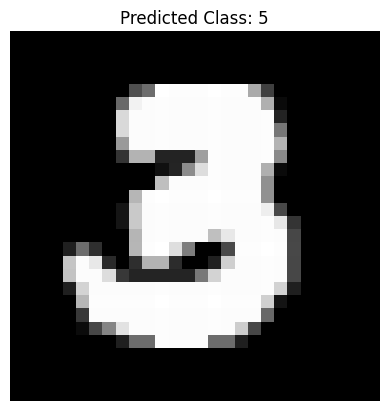

In [8]:
# Get the predicted class for a single test sample
single_test_sample = test_X[200]  # Change the index to test other samples
predicted_class = predict_single(single_test_sample)
print(f"Predicted Class for sample 0: {predicted_class}")

# If you want to visualize the sample, you can use matplotlib (optional)
import matplotlib.pyplot as plt

# Display the test sample
plt.imshow(single_test_sample.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()
